In [1]:
import numpy
import time
import torch
from torch import nn,optim
import sys
sys.path.append("..")
import dlzh.d2lzh_pytorch as d2l
device = torch.device('cuda' if torch.cuda.is_available() else'cpu')
print(device)
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv=nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2,stride=2),
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5),
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.fc = nn.Sequential(
            nn.Linear(16*4*4,120),
            nn.Sigmoid(),
            nn.Linear(120,84),
            nn.Sigmoid(),
            nn.Linear(84,10)
        )
    def forward(self, img):
        feature=self.conv(img)
        output=self.fc(feature.view(img.shape[0],-1))
        return output
net = LeNet()
print(net)




cpu
LeNet(
  (conv): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Sigmoid()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [35]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n
def train_ch5(net, train_iter, test_iter, batch_size, optimizer, device, num_epochs):
    net = net.to(device)
    print("training on ", device)
    loss = torch.nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, batch_count, start = 0.0, 0.0, 0, 0, time.time()
        for X, y in train_iter:
            X = X.to(device)
            y = y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_l_sum += l.cpu().item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().cpu().item()
            n += y.shape[0]
            batch_count += 1
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, time %.1f sec'
              % (epoch + 1, train_l_sum / batch_count, train_acc_sum / n, test_acc, time.time() - start))


In [37]:
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size=batch_size)

lr, num_epochs = 0.001, 5
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
train_ch5(net, train_iter, test_iter, batch_size, optimizer, device,
num_epochs)


training on  cpu
epoch 1, loss 0.3307, train acc 0.877, test acc 0.868, time 14.3 sec
epoch 2, loss 0.3255, train acc 0.879, test acc 0.867, time 14.1 sec
epoch 3, loss 0.3214, train acc 0.880, test acc 0.872, time 13.7 sec
epoch 4, loss 0.3186, train acc 0.881, test acc 0.867, time 13.7 sec
epoch 5, loss 0.3152, train acc 0.883, test acc 0.873, time 13.9 sec


TypeError: show_fashion_mnist() takes 2 positional arguments but 3 were given

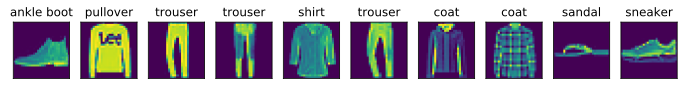

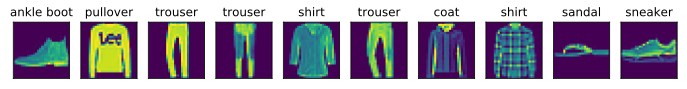

In [46]:
test,labels=iter(test_iter).next()
test=test[0:10]
labels2=net(test)
# print(labels2)
labels2=labels2.argmax(dim=1).numpy()

d2l.show_fashion_mnist(test,d2l.get_fashion_mnist_labels(labels2))
d2l.show_fashion_mnist(test,d2l.get_fashion_mnist_labels(labels))
